In [2]:
import spacy
import pandas as pd

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
text = "apple pear banana fruit clean service car Volkswagen rotor motor diesel"
words = text.split()
words

['apple',
 'pear',
 'banana',
 'fruit',
 'clean',
 'service',
 'car',
 'Volkswagen',
 'rotor',
 'motor',
 'diesel']

In [5]:
nlps = {word : [nlp(word).similarity(nlp(w2)) for w2 in words] for word in words}

In [6]:
nlps

{'apple': [1.0,
  0.6126545513188124,
  0.5831844168885263,
  0.6306182573144234,
  0.24917477117712128,
  0.14746461199597916,
  0.21747096456847748,
  0.20986766498568266,
  0.030624489535491642,
  0.08191350415116308,
  0.0820441345213803],
 'pear': [0.6126545513188124,
  1.0,
  0.5490886815023996,
  0.6357981996187685,
  0.19543353012136508,
  -0.030527643537994063,
  0.040393051567965035,
  0.05526357737086657,
  0.09375068255932234,
  0.0036036678277640375,
  0.031724842325513015],
 'banana': [0.5831844168885263,
  0.5490886815023996,
  1.0,
  0.6714834326867286,
  0.23667835406177015,
  0.022728524260608084,
  0.1617266961842667,
  0.07450854038686194,
  0.0874547317006461,
  0.14404861324283158,
  0.09663080358464168],
 'fruit': [0.6306182573144234,
  0.6357981996187685,
  0.6714834326867286,
  1.0,
  0.31238039911121707,
  0.13960512057815852,
  0.16625449666597905,
  0.0492474805688369,
  0.05345538486653936,
  0.11046394678816969,
  0.08064157324368555],
 'clean': [0.2491747

In [7]:
simatrix = pd.DataFrame(nlps, index=words)
simatrix

,apple,pear,banana,fruit,clean,service,car,Volkswagen,rotor,motor,diesel
apple,1.000000,0.612655,0.583184,0.630618,0.249175,0.147465,0.217471,0.209868,0.030624,0.081914,0.082044
pear,0.612655,1.000000,0.549089,0.635798,0.195434,-0.030528,0.040393,0.055264,0.093751,0.003604,0.031725
banana,0.583184,0.549089,1.000000,0.671483,0.236678,0.022729,0.161727,0.074509,0.087455,0.144049,0.096631
fruit,0.630618,0.635798,0.671483,1.000000,0.312380,0.139605,0.166254,0.049247,0.053455,0.110464,0.080642
clean,0.249175,0.195434,0.236678,0.312380,1.000000,0.337588,0.343636,0.100749,0.152705,0.275795,0.301641
service,0.147465,-0.030528,0.022729,0.139605,0.337588,1.000000,0.378894,0.149039,0.086572,0.246254,0.206542
car,0.217471,0.040393,0.161727,0.166254,0.343636,0.378894,1.000000,0.441767,0.159920,0.565522,0.459310
Volkswagen,0.209868,0.055264,0.074509,0.049247,0.100749,0.149039,0.441767,1.000000,0.126758,0.315998,0.447923
rotor,0.030624,0.093751,0.087455,0.053455,0.152705,0.086572,0.159920,0.126758,1.000000,0.510341,0.261457
motor,0.081914,0.003604,0.144049,0.110464,0.275795,0.246254,0.565522,0.315998,0.510341,1.000000,0.549873


In [8]:
sim_hmp = simatrix.apply(lambda x: x > 0.4)
sim_hmp

,apple,pear,banana,fruit,clean,service,car,Volkswagen,rotor,motor,diesel
apple,True,True,True,True,False,False,False,False,False,False,False
pear,True,True,True,True,False,False,False,False,False,False,False
banana,True,True,True,True,False,False,False,False,False,False,False
fruit,True,True,True,True,False,False,False,False,False,False,False
clean,False,False,False,False,True,False,False,False,False,False,False
service,False,False,False,False,False,True,False,False,False,False,False
car,False,False,False,False,False,False,True,True,False,True,True
Volkswagen,False,False,False,False,False,False,True,True,False,False,True
rotor,False,False,False,False,False,False,False,False,True,True,False
motor,False,False,False,False,False,False,True,False,True,True,True


In [9]:
import seaborn as sns

<AxesSubplot:>

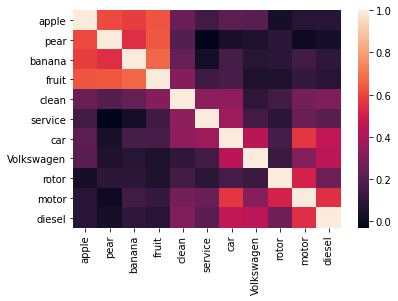

In [10]:
sns.heatmap(simatrix)

<AxesSubplot:>

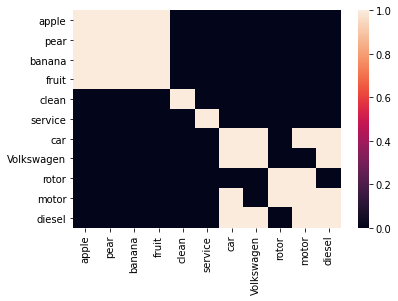

In [11]:
sns.heatmap(simatrix > 0.4)